<a href="https://colab.research.google.com/github/SharanyaVermaRaj/test/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving 275b98a3-69e2-4b48-ab1c-7b26bcd5d1f1.jpg to 275b98a3-69e2-4b48-ab1c-7b26bcd5d1f1.jpg
Saving 5758a4b4-eaf0-4af6-928e-b1650a465f1d.jpg to 5758a4b4-eaf0-4af6-928e-b1650a465f1d.jpg
Saving cc2855b1-2a71-4c68-a19f-503a0b2643b3.jpg to cc2855b1-2a71-4c68-a19f-503a0b2643b3.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the images
img1 = cv2.imread('underexposed.jpg')
img2 = cv2.imread('correct_exposed.jpg')
img3 = cv2.imread('overexposed.jpg')


In [9]:
img1 = cv2.imread('underexposed.jpg')
img2 = cv2.imread('correct_exposed.jpg')
img3 = cv2.imread('overexposed.jpg')


In [10]:
print(img1)  # Should output array data if loaded correctly
print(img2)
print(img3)


None
None
None


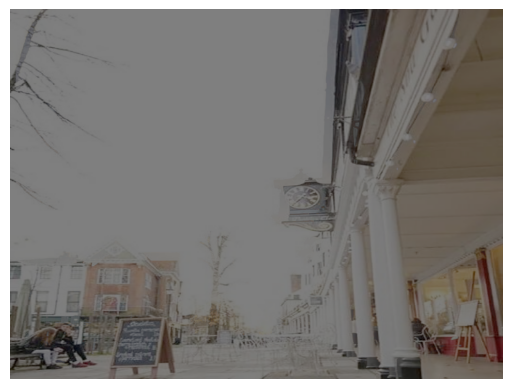

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image paths
img_paths = [
    '275b98a3-69e2-4b48-ab1c-7b26bcd5d1f1.jpg',
    '5758a4b4-eaf0-4af6-928e-b1650a465f1d.jpg',
    'cc2855b1-2a71-4c68-a19f-503a0b2643b3.jpg'
]

images = []
target_size = (800, 600)

# Load and resize images
for path in img_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Error loading image: {path}")
    else:
        img_resized = cv2.resize(img, target_size)
        img_float = img_resized.astype(np.float32)
        images.append(img_float)

# Check if enough images were loaded
if len(images) < 3:
    raise ValueError("Not enough images loaded for HDR merging.")

# Merge images using maximum value for HDR
hdr_image = np.maximum(np.maximum(images[0], images[1]), images[2])

# Normalize HDR image for display
hdr_image = cv2.normalize(hdr_image, None, 0, 255, cv2.NORM_MINMAX)
hdr_image = np.uint8(hdr_image)

# Save the HDR image
cv2.imwrite('hdr_output.jpg', hdr_image)

# Tone mapping
hdr_image_normalized = hdr_image / np.max(hdr_image)  # Normalize HDR image to [0, 1]
tone_mapped = (hdr_image_normalized / (1 + hdr_image_normalized)) * 255
tone_mapped = np.clip(tone_mapped, 0, 255).astype(np.uint8)

# Display the tone-mapped image
plt.imshow(cv2.cvtColor(tone_mapped, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
